In [1]:
!pip install -U pandas_profiling

Defaulting to user installation because normal site-packages is not writeable
                                              0.0/324.4 kB ? eta -:--:--
     -------                                 61.4/324.4 kB 3.2 MB/s eta 0:00:01
     -----------------------------          256.0/324.4 kB 3.9 MB/s eta 0:00:01
     -------------------------------------- 324.4/324.4 kB 3.3 MB/s eta 0:00:00
                                              0.0/352.3 kB ? eta -:--:--
     -----------------                      163.8/352.3 kB 5.0 MB/s eta 0:00:01
     -------------------------------------  348.2/352.3 kB 4.3 MB/s eta 0:00:01
     -------------------------------------- 352.3/352.3 kB 3.1 MB/s eta 0:00:00
                                              0.0/42.2 MB ? eta -:--:--
                                              0.3/42.2 MB 5.7 MB/s eta 0:00:08
                                              0.5/42.2 MB 6.2 MB/s eta 0:00:07
                                              0.7/42.2 MB 5.6 MB/s

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20360\4038897056.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [8]:
df_reviews = pd.read_csv(r"C:\Users\LENOVO\Downloads\review_dataset(2).csv")
df_reviews.head()

product_name  \
0  Sony PlayStation PS2 Gaming Console 150 GB Har...   
1           Vmax HX 750 Quadcopter Drone (No Camera)   
2  Yoshops VR BOX Virtual Reality Glasses Headset...   
3   Sony PlayStation PS3 Console Slim 320 GB (Black)   
4                                 Barbie Doll (pink)   

                                         product_url      category   status  \
0  https://yoshops.com/products/sony-playstation-...  Toys & Games  Reviewd   
1  https://yoshops.com/products/hx-750-remote-con...  Toys & Games  Reviewd   
2  https://yoshops.com/products/yoshops-vr-box-vi...  Toys & Games  Reviewd   
3  https://yoshops.com/products/sony-playstation-...  Toys & Games  Reviewd   
4           https://yoshops.com/products/barbie-doll  Toys & Games  Reviewd   

             stars  
0  5.0 star rating  
1  5.0 star rating  
2  5.0 star rating  
3  4.9 star rating  
4  4.9 star rating

In [9]:
df_orders = pd.read_csv(r"C:\Users\LENOVO\Downloads\orders_DataSet_Updated(1).csv")
df_orders.head()

Order # Fulfillment Date and Time Stamp Currency Subtotal  \
0  R121113121                             NaN      INR     2299   
1  R472890631                             NaN      INR     2299   
2  R004476488                             NaN      INR     2299   
3  R526038353                             NaN      INR     2299   
4  R658530771                             NaN      INR      349   

  Shipping Method  Shipping Cost Tax Method  Taxes Total Coupon Code  ...  \
0      Ships Free              0        NaN    0.0  2299         NaN  ...   
1      Ships Free              0        NaN    0.0  2299         NaN  ...   
2      Ships Free              0        NaN    0.0  2299         NaN  ...   
3      Ships Free              0        NaN    0.0  2299         NaN  ...   
4      Ships Free              0        NaN    0.0   349         NaN  ...   

  Tracking #  Special Instructions  \
0        NaN                   NaN   
1        NaN                   NaN   
2        NaN                   NaN   
3        NaN                   NaN   
4        NaN                   NaN   

                                       LineItem Name LineItem SKU  \
0  Falcon Drone Four Axis Aircraft with 2.4 GHz R...    PL0093416   
1  Falcon Drone Four Axis Aircraft with 2.4 GHz R...    PL0093416   
2  Falcon Drone Four Axis Aircraft with 2.4 GHz R...    PL0093416   
3  Falcon Drone Four Axis Aircraft with 2.4 GHz R...    PL0093416   
4                                 Barbie Doll (pink)      PL00098   

  LineItem Options LineItem Add-ons LineItem Qty LineItem Sale Price  \
0              NaN              NaN            1                2299   
1              NaN              NaN            1                2299   
2              NaN              NaN            1                2299   
3              NaN              NaN            1                2299   
4              NaN              NaN            1                 349   

  Download Status LineItem Type  
0             NaN      physical  
1             NaN      physical  
2             NaN      physical  
3             NaN      physical  
4             NaN      physical  

[5 rows x 38 columns]

In [10]:
df_reviews['stars'] = df_reviews['stars'].str[:4]
df_reviews.head()

product_name  \
0  Sony PlayStation PS2 Gaming Console 150 GB Har...   
1           Vmax HX 750 Quadcopter Drone (No Camera)   
2  Yoshops VR BOX Virtual Reality Glasses Headset...   
3   Sony PlayStation PS3 Console Slim 320 GB (Black)   
4                                 Barbie Doll (pink)   

                                         product_url      category   status  \
0  https://yoshops.com/products/sony-playstation-...  Toys & Games  Reviewd   
1  https://yoshops.com/products/hx-750-remote-con...  Toys & Games  Reviewd   
2  https://yoshops.com/products/yoshops-vr-box-vi...  Toys & Games  Reviewd   
3  https://yoshops.com/products/sony-playstation-...  Toys & Games  Reviewd   
4           https://yoshops.com/products/barbie-doll  Toys & Games  Reviewd   

  stars  
0  5.0   
1  5.0   
2  5.0   
3  4.9   
4  4.9

In [11]:
df_reviews['stars'] = pd.to_numeric(df_reviews['stars'], errors='coerce')
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  1861 non-null   object 
 1   product_url   1861 non-null   object 
 2   category      1861 non-null   object 
 3   status        606 non-null    object 
 4   stars         606 non-null    float64
dtypes: float64(1), object(4)
memory usage: 72.8+ KB


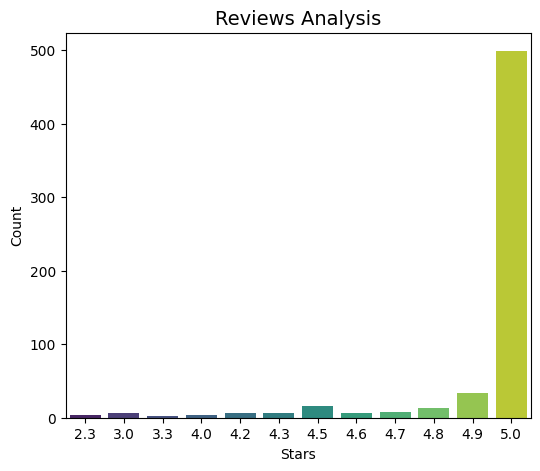

In [12]:
plt.figure(figsize=(6,5))
sns.countplot(data=df_reviews, x='stars', palette='viridis')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.title('Reviews Analysis', fontsize=14)
plt.show()

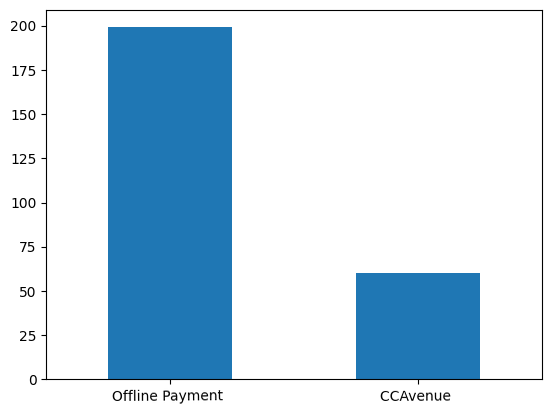

In [13]:
# plotting a bar plot of payment methods
new = df_orders['Payment Method'].str.split('₹', expand=True)
new[0].value_counts().plot.bar(rot=.4);

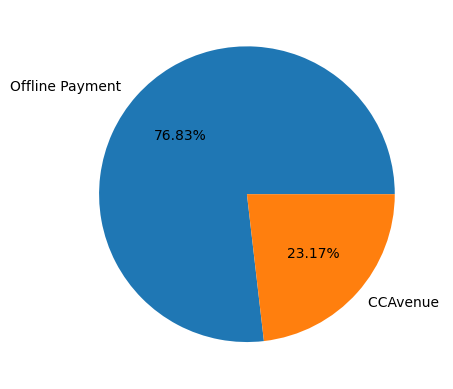

In [14]:
# plotting a bar plot of 'Payment Methods'
new = df_orders['Payment Method'].str.split('₹', expand=True)
new[0].value_counts(normalize=True).plot.pie(rot=.4, autopct='%.2f%%')
plt.ylabel('')
plt.show()

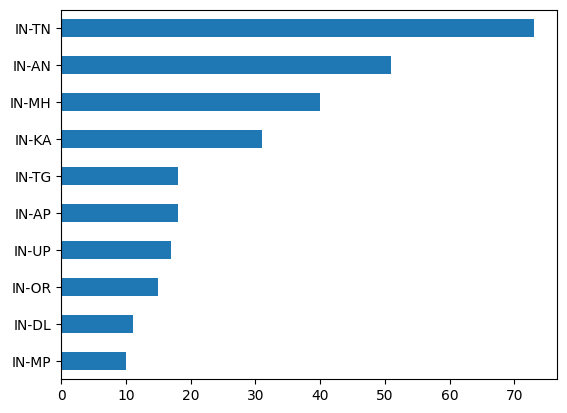

In [15]:
# plotting top 10 consumer Indian states
df_orders['Billing State'].value_counts(ascending=False)[:10].sort_values().plot.barh();

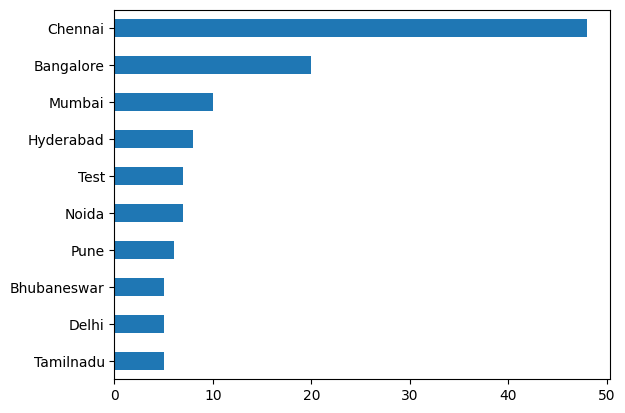

In [16]:
# plotting top 10 consumer Indian states
data = df_orders['Billing City'].replace(to_replace=['chennai', 'CHENNAI'], value='Chennai')
data.str.capitalize().value_counts()[:10].sort_values().plot.barh();

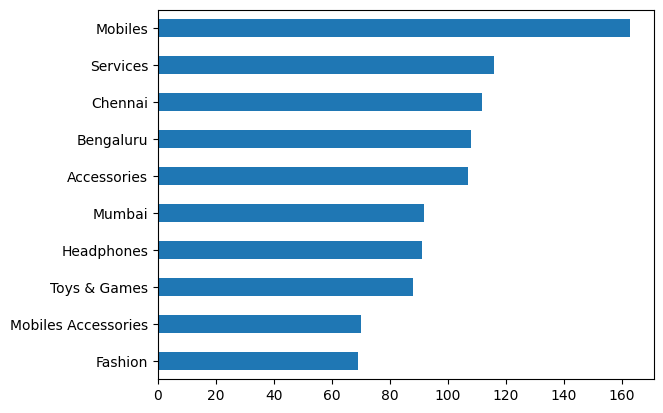

In [17]:
df_reviews['category'].value_counts()[:10].sort_values(ascending=True).plot.barh();

In [18]:
# checking the available categories
df_reviews.category.unique()

array(['Toys & Games', 'PlayStation', 'Drones', 'RC Toys', 'Soft Toys',
       'Gaming Accessories', 'Mobiles', 'Smartphones', 'Headphones',
       'Mobiles Accessories', 'Feature Keypad Mobiles', 'Laptops',
       'Gaming Laptops', 'Personal Laptops', 'Tablets',
       'Laptop Accessories', 'Computers Accessories', 'Accessories',
       'Books', 'Stationery', 'Bags', 'SpareParts', 'Auto spare parts',
       'Mobile Spare Parts', 'Laptop spare parts', 'More', 'Electronics',
       'Led TV', 'Others', 'Home & Kitchen', 'Irons',
       'Mixer Grinder Juicer', 'Fashion', 'Men', 'Men Clothing',
       'Sunglasses', 'Watches', "Men's Footwear", 'Womens',
       'Women Clothing', 'Face Makeup', 'Personal Care', 'Kids',
       'Kids Clothing', 'Shoes', 'Foods', 'Organic foods', 'Vegetable',
       'Non Veg', 'Seafood', 'Biryani', 'Services', 'Online Live Tuition',
       'Training Internship Work From Home', 'PCD Pharma Franchise',
       'Sponsorship Marketing', 'Blog Sponsorship',
       'I

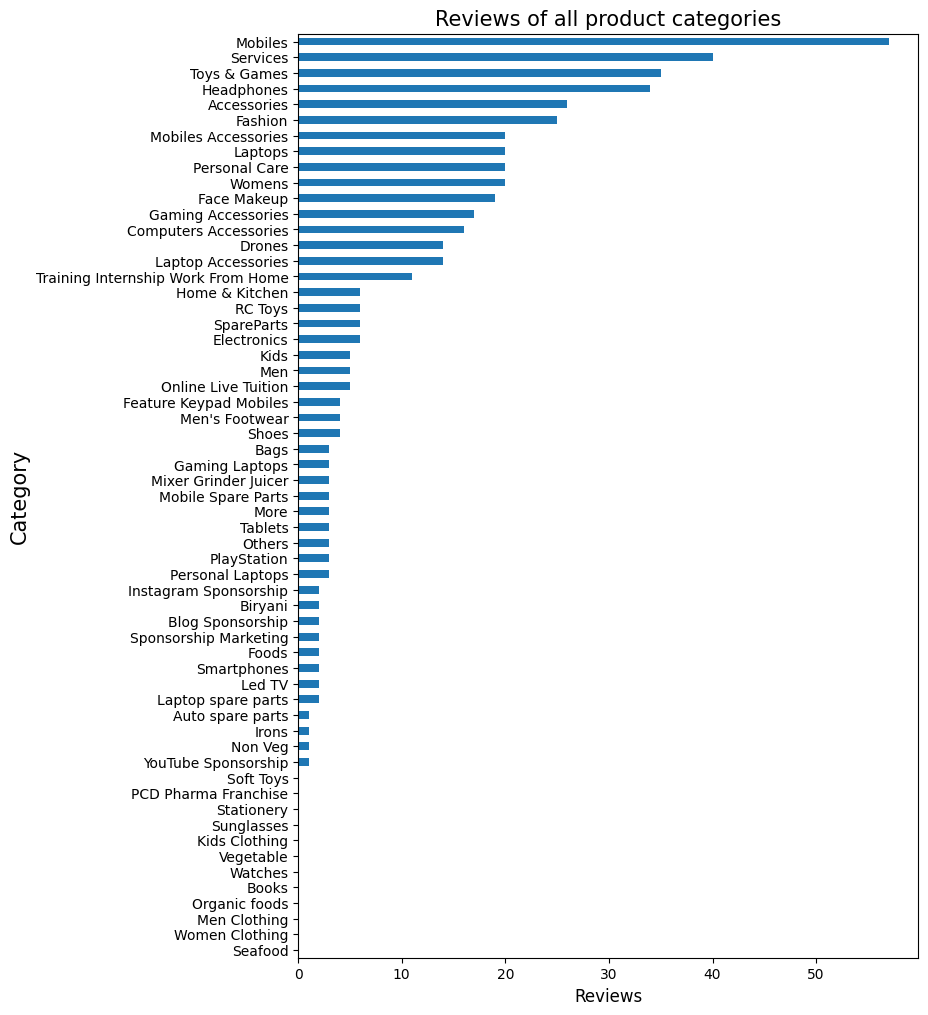

In [19]:
# applying a filter to skip the city names & plotting the results
filt = (df_reviews['category'].isin(['Chennai', 'Mumbai', 'Bengaluru']))
df_reviews.loc[~filt].groupby(['category'])['stars'].count().sort_values(ascending=True).plot.barh(figsize=(8, 12))
plt.ylabel('Category', fontsize=15)
plt.xlabel('Reviews', fontsize=12)
plt.title('Reviews of all product categories', fontsize=15);

In [20]:
# converting the dtype of 'Fulfillment Date and Time Stamp'
df_orders['Fulfillment Date and Time Stamp'] = pd.to_datetime(df_orders['Fulfillment Date and Time Stamp'], errors='coerce')

In [21]:
# creating new features for months and years 
df_orders['month'] = df_orders['Fulfillment Date and Time Stamp'].dt.month
df_orders['year'] = df_orders['Fulfillment Date and Time Stamp'].dt.year

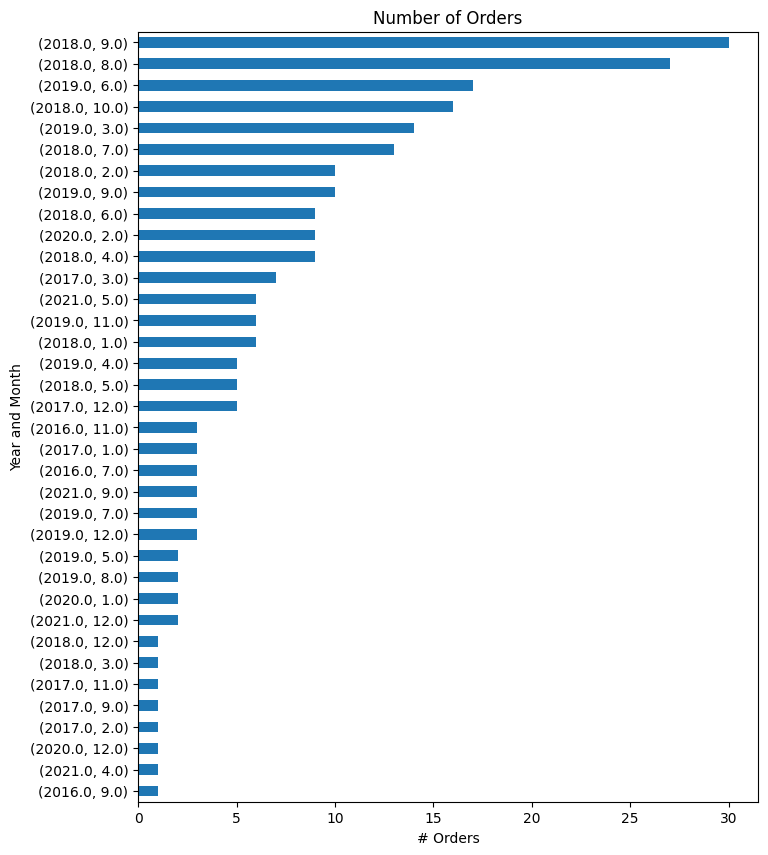

In [22]:
df_orders.groupby(['year','month'])['Order #'].count().sort_values(ascending=True).plot(kind='barh', figsize=(8, 10))
plt.ylabel('Year and Month')
plt.xlabel('# Orders')
plt.title('Number of Orders');

In [23]:
# converting the dtype of 'Fulfillment Date and Time Stamp'
df_orders['Fulfillment Date and Time Stamp'] = pd.to_datetime(df_orders['Fulfillment Date and Time Stamp'], errors='coerce')

In [24]:
# creating new features for months and years 
df_orders['month'] = df_orders['Fulfillment Date and Time Stamp'].dt.month
df_orders['year'] = df_orders['Fulfillment Date and Time Stamp'].dt.year

In [25]:
df_orders.assign(column='stars', values=df_reviews['stars'], inplace=True)

Order # Fulfillment Date and Time Stamp Currency Subtotal  \
0     R121113121                             NaT      INR     2299   
1     R472890631                             NaT      INR     2299   
2     R004476488                             NaT      INR     2299   
3     R526038353                             NaT      INR     2299   
4     R658530771                             NaT      INR      349   
...          ...                             ...      ...      ...   
3034  R243395005                             NaT      INR       50   
3035  R607209508                             NaT      INR      500   
3036  R140316623                             NaT      INR     4000   
3037  R192037084                             NaT      INR     2000   
3038  R414254148       2016-09-28 19:05:30+05:30      INR     2000   

     Shipping Method  Shipping Cost Tax Method  Taxes Total Coupon Code  ...  \
0         Ships Free              0        NaN    0.0  2299         NaN  ...   
1         Ships Free              0        NaN    0.0  2299         NaN  ...   
2         Ships Free              0        NaN    0.0  2299         NaN  ...   
3         Ships Free              0        NaN    0.0  2299         NaN  ...   
4         Ships Free              0        NaN    0.0   349         NaN  ...   
...              ...            ...        ...    ...   ...         ...  ...   
3034      Ships Free              0        NaN    0.0    50         NaN  ...   
3035      Ships Free              0        NaN    0.0   500         NaN  ...   
3036      Ships Free              0        NaN    0.0  4000         NaN  ...   
3037      Ships Free              0        NaN    0.0  2000         NaN  ...   
3038      Ships Free              0        NaN    0.0  2000         NaN  ...   

     LineItem Add-ons  LineItem Qty LineItem Sale Price Download Status  \
0                 NaN             1                2299             NaN   
1                 NaN             1                2299             NaN   
2                 NaN             1                2299             NaN   
3                 NaN             1                2299             NaN   
4                 NaN             1                 349             NaN   
...               ...           ...                 ...             ...   
3034              NaN             1                  50             NaN   
3035              NaN             1                 500             NaN   
3036              NaN             2                2000             NaN   
3037              NaN             1                2000             NaN   
3038              NaN             1                2000             NaN   

     LineItem Type month    year column values inplace  
0         physical   NaN     NaN  stars    5.0    True  
1         physical   NaN     NaN  stars    5.0    True  
2         physical   NaN     NaN  stars    5.0    True  
3         physical   NaN     NaN  stars    4.9    True  
4         physical   NaN     NaN  stars    4.9    True  
...            ...   ...     ...    ...    ...     ...  
3034      physical   NaN     NaN  stars    NaN    True  
3035      physical   NaN     NaN  stars    NaN    True  
3036      physical   NaN     NaN  stars    NaN    True  
3037      physical   NaN     NaN  stars    NaN    True  
3038      physical   9.0  2016.0  stars    NaN    True  

[3039 rows x 43 columns]

In [26]:
df_orders.groupby(['year','month', 'stars']).count().sort_values(ascending=True).plot(kind='barh', figsize=(8, 10))
plt.ylabel('Year and Month')
plt.xlabel('# Orders')
plt.title('Number of Orders');

KeyError: 'stars'

In [27]:
df_orders['stars'].head()

KeyError: 'stars'

In [28]:
df_orders['day'] = df_orders['Fulfillment Date and Time Stamp'].dt.weekday

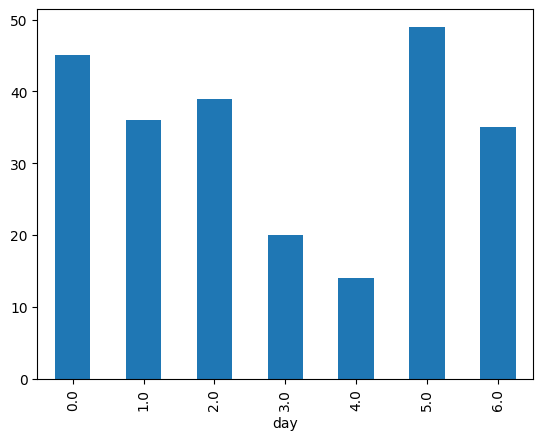

In [29]:
df_orders.groupby(['day'])['Order #'].count().plot(kind='bar');

In [30]:
# report of reviews dataset
profile_1 = ProfileReport(df_reviews, title='Full Report of Reviews Dataset', html={'style': {'full_width': True}})
profile_1.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [31]:
# report of orders dataset
profile_2 = ProfileReport(df_orders, title='Full Report of Reviews Dataset', html={'style': {'full_width': True}})
profile_2.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# FUNCTION TO ANALYZE THE DATA

In [33]:
# defining a function
def main():
    
    print("************ Welcome to Yoshop **************")
    
    choice = int(input("""
                      1: see the analysis of Reviews given by Customers
                      2: see the analysis of different payment methods used by the Customers
                      3: see the analysis of Top Consumer States of India
                      4: see the analysis of Top Consumer Cities of India
                      5: see the analysis of Top Selling Product Categories
                      6: see the analysis of Reviews for All Product Categories
                      7: see the analysis of Number of Orders Per Month Per Year
                      8: see the analysis of Reviews for Number of Orders Per Month Per Year
                      9: see the analysis of Number of Orders Across Parts of a Day
                      10: see the Full Report

                      Please enter your choice: """))
    
    
    if choice == 1 :
        i=sns.countplot(y=df_reviews.stars)
        
    elif choice == 2:
        i=df_orders.value_counts().plot(kind='pie')
        
    elif choice == 3:
        i=df_orders['Billing State'].value_counts()[:10].plot(kind='bar') 
        
    elif choice == 4:
        i=df_orders['Billing City'].value_counts()[:10].plot(kind='bar')
        
    elif choice == 5:
        i=df_reviews['category'].value_counts()[:10].plot(kind='barh')
        
    elif choice == 6:
        i=df_reviews.groupby(['category'])['status'].count()[:10].plot(kind='bar')
        
    elif choice == 7:
        i=df_orders.sort_values(ascending=False)[:10].plot(kind='bar')
        
    elif choice == 8:
        print('The work is under progress try after some time...')
        
    elif choice == 9:
        i=df_orders.groupby(['year','months'])['Order #'].count().plot(kind='bar')
    
    elif choice == 10:
        i=df_orders.groupby(['day'])['Order #'].count().plot(kind='bar')
    
    else:
        print("You must only select Integer Value")
        print("Please try again")
    
    plt.savefig('reviews_by_customers.pdf')

************ Welcome to Yoshop **************

                      1: see the analysis of Reviews given by Customers
                      2: see the analysis of different payment methods used by the Customers
                      3: see the analysis of Top Consumer States of India
                      4: see the analysis of Top Consumer Cities of India
                      5: see the analysis of Top Selling Product Categories
                      6: see the analysis of Reviews for All Product Categories
                      7: see the analysis of Number of Orders Per Month Per Year
                      8: see the analysis of Reviews for Number of Orders Per Month Per Year
                      9: see the analysis of Number of Orders Across Parts of a Day
                      10: see the Full Report

                      Please enter your choice: 1


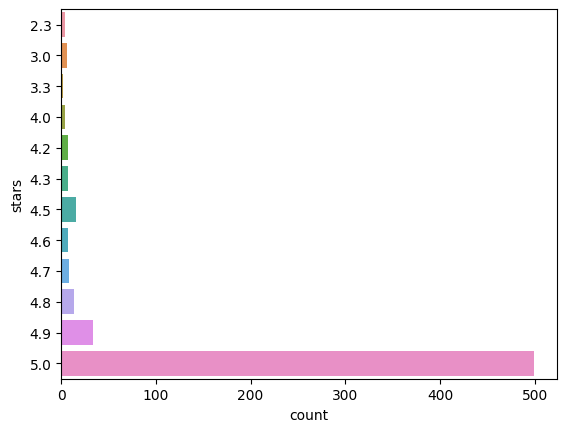

In [34]:
# caling the function
main()